# Giảm nhiễu hình ảnh - Image Denoising

Trong các chương trước, chúng ta đã thấy nhiều kỹ thuật làm mịn hình ảnh như Làm mờ theo Gauss, Làm mờ trung vị, v.v. và chúng hiệu quả ở một mức độ nào đó trong việc loại bỏ lượng nhiễu nhỏ. Trong các kỹ thuật đó, chúng tôi đã lấy một vùng lân cận nhỏ xung quanh một pixel và thực hiện một số phép toán như trung bình có trọng số Gauss, trung vị của các giá trị, v.v. để thay thế phần tử trung tâm. Tóm lại, việc loại bỏ nhiễu tại một pixel là cục bộ đối với vùng lân cận của nó.

Có một đặc tính của nhiễu. Nhiễu thường được coi là một biến ngẫu nhiên có giá trị trung bình bằng không. Hãy xem xét một pixel nhiễu, $p = p_0 + n$ trong đó $p_0$ là giá trị thực của pixel và $n$ là nhiễu trong pixel đó. Bạn có thể lấy một số lượng lớn các pixel giống nhau (ví dụ $N$) từ các hình ảnh khác nhau và tính giá trị trung bình của chúng. Lý tưởng nhất là bạn sẽ nhận được $p = p_0$ vì giá trị trung bình của nhiễu bằng không.

Bạn có thể tự xác minh bằng một thiết lập đơn giản. Giữ một máy ảnh tĩnh ở một vị trí nhất định trong vài giây. Thao tác này sẽ cung cấp cho bạn nhiều khung hình hoặc nhiều hình ảnh của cùng một cảnh. Sau đó, hãy viết một đoạn mã để tìm giá trị trung bình của tất cả các khung hình trong video (Điều này có vẻ quá đơn giản đối với bạn). So sánh kết quả cuối cùng và khung hình đầu tiên. Bạn có thể thấy độ nhiễu giảm đi. Thật không may, phương pháp đơn giản này không hiệu quả với chuyển động của máy quay và cảnh. Ngoài ra, thường chỉ có một hình ảnh nhiễu khả dụng.

Ý tưởng rất đơn giản, chúng ta cần một tập hợp các hình ảnh tương tự để tính giá trị trung bình của nhiễu. Hãy xem xét một cửa sổ nhỏ (ví dụ như cửa sổ 5x5) trong hình ảnh. Có khả năng cao là cùng một mảng có thể ở một nơi khác trong hình ảnh. Đôi khi là trong một khu phố nhỏ xung quanh nó. Còn việc sử dụng các mảng tương tự này với nhau và tìm giá trị trung bình của chúng thì sao? Đối với cửa sổ cụ thể đó, điều đó là ổn. Xem một hình ảnh ví dụ bên dưới:

![image](https://docs.opencv.org/4.x/nlm_patch.jpg)

Các mảng màu xanh lam trong hình ảnh trông giống nhau. Các mảng màu xanh lá cây trông giống nhau. Vì vậy, chúng tôi lấy một pixel, lấy cửa sổ nhỏ xung quanh nó, tìm kiếm các cửa sổ tương tự trong hình ảnh, tính trung bình tất cả các cửa sổ và thay thế pixel bằng kết quả chúng tôi nhận được. Phương pháp này là Non-Local Means Denoising. Nó mất nhiều thời gian hơn so với các kỹ thuật làm mờ mà chúng ta đã thấy trước đó, nhưng kết quả của nó rất tốt. Bạn có thể tìm thấy thêm thông tin chi tiết và bản demo trực tuyến tại liên kết đầu tiên trong các tài nguyên bổ sung.

Đối với hình ảnh màu, hình ảnh được chuyển đổi sang không gian màu CIELAB và sau đó nó khử nhiễu riêng các thành phần L và AB.

## Khử nhiễu hình ảnh trong OpenCV
OpenCV cung cấp bốn biến thể của kỹ thuật này.
1. `fastNlMeansDenoising()` - hoạt động với một hình ảnh thang độ xám duy nhất
2. `fastNlMeansDenoisingColored()` - hoạt động với một hình ảnh màu.
3. `fastNlMeansDenoisingMulti()` - hoạt động với chuỗi hình ảnh được chụp trong thời gian ngắn (hình ảnh thang độ xám)
4. `fastNlMeansDenoisingColoredMulti()` - giống như trên, nhưng dành cho hình ảnh màu.

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### **fastNlMeansDenoising**


#### Cú pháp hàm
```python
dst = cv2.fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]])
```
Hàm có 1 đối số bắt buộc:  
- `src`: Ảnh đầu vào (ảnh xám, mảng numpy, kiểu uint8).

Giải thích:  
- `dst`: Ảnh đầu ra sau khi khử nhiễu (tùy chọn).
- `h`: Tham số lọc (giá trị càng lớn càng loại bỏ nhiều nhiễu, mặc định là 3-10).
- `templateWindowSize`: Kích thước cửa sổ mẫu (số lẻ, mặc định là 7).
- `searchWindowSize`: Kích thước cửa sổ tìm kiếm (số lẻ, mặc định là 21).

Kết quả trả về:
- `dst`: Ảnh đã được khử nhiễu, cùng kích thước và kiểu với `src`.

(<Axes: >, <matplotlib.image.AxesImage at 0x19dafb2b8b0>)

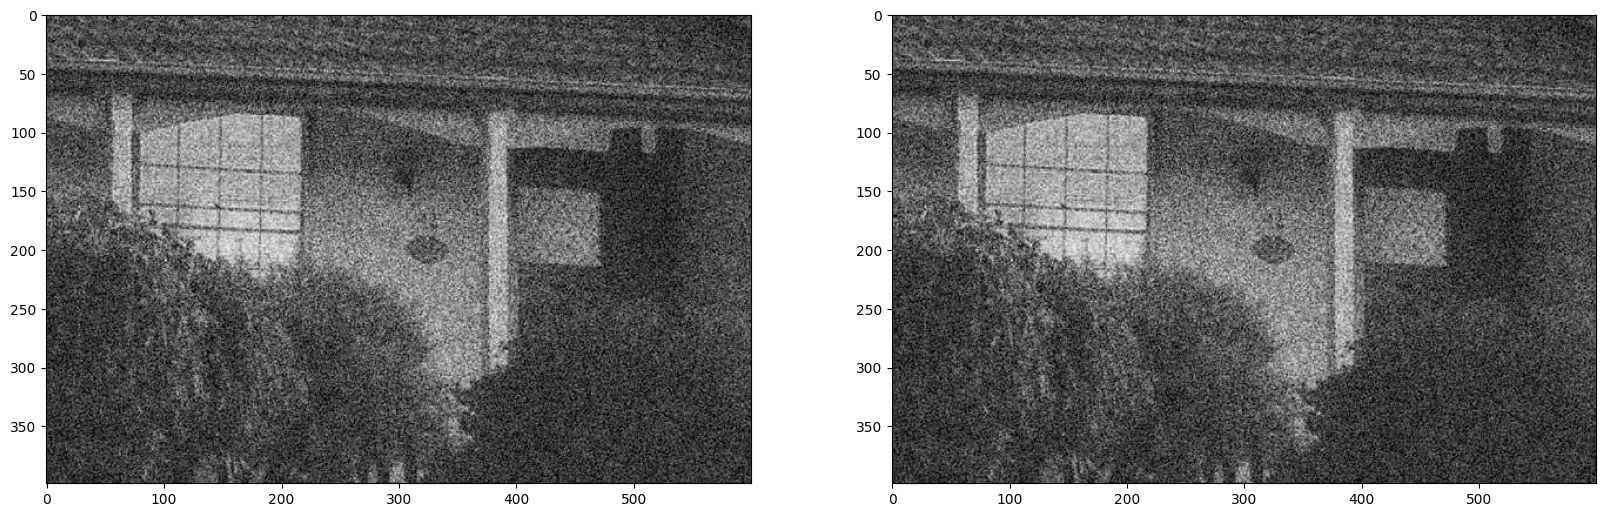

In [13]:
src = cv2.imread('images/noise.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.fastNlMeansDenoising(src)

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(src, cmap='gray')
plt.subplot(122), plt.imshow(dst, cmap='gray')

### **fastNlMeansDenoisingColored**

#### Cú pháp hàm
```python
dst = cv2.fastNlMeansDenoisingColored(src[, dst[, h[, hColor[, templateWindowSize[, searchWindowSize]]]]])
```

Hàm có đối số bắt buộc:
- `src`: Ảnh đầu vào (ảnh xám, mảng numpy, kiểu uint8).

Giải thích:
- `dst`: Ảnh đầu ra sau khi khử nhiễu (tùy chọn).
- `h`: Tham số lọc (giá trị càng lớn càng loại bỏ nhiều nhiễu, mặc định là 3-10).
- `hColor`: Tham số lọc cho thành phần màu (mặc định 3-10).
- `templateWindowSize`: Kích thước cửa sổ mẫu (số lẻ, mặc định là 7).
- `searchWindowSize`: Kích thước cửa sổ tìm kiếm (số lẻ, mặc định là 21).

Kết quả trả về:
- `dst`: Ảnh đã được khử nhiễu, cùng kích thước và kiểu với `src`.

(<Axes: >, <matplotlib.image.AxesImage at 0x19dad4f3ca0>)

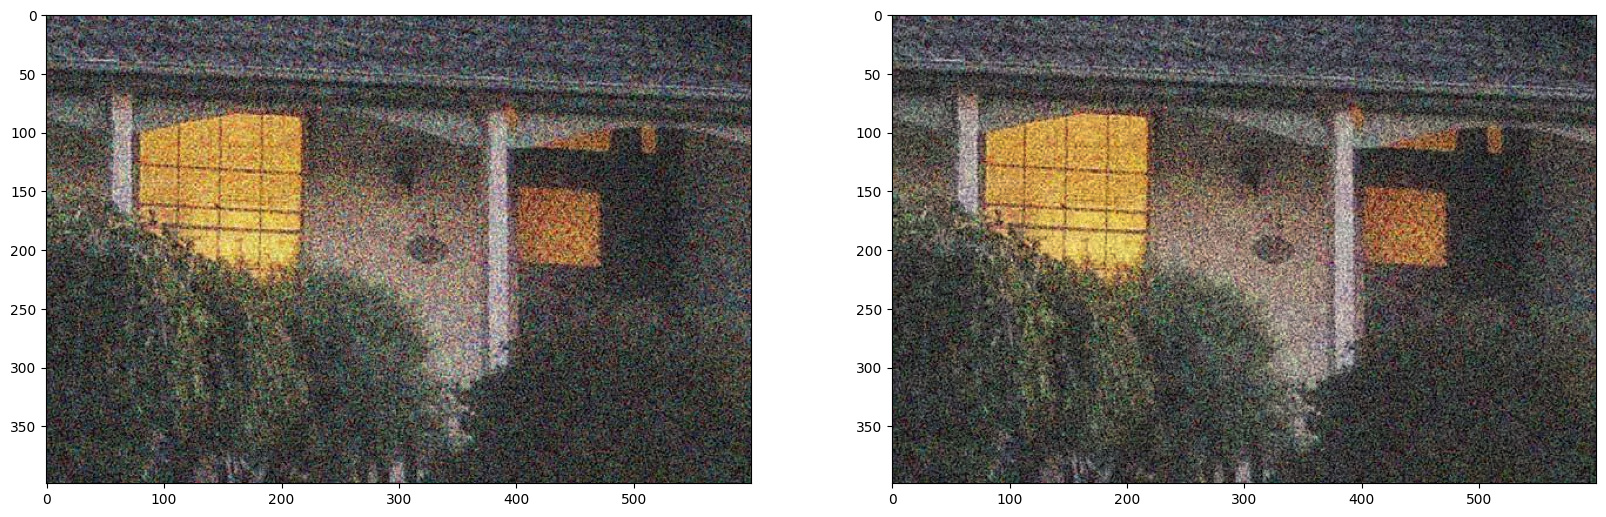

In [16]:
src = cv2.imread('images/noise.jpg', cv2.IMREAD_COLOR)
dst = cv2.fastNlMeansDenoisingColored(src)

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### **fastNlMeansDenoisingMulti**

#### Cú pháp hàm
```python
dst = cv2.fastNlMeansDenoisingMulti(srcImgs, imgToDenoiseIndex, temporalWindowSize[, dst[, h[, templateWindowSize[, searchWindowSize]]]])
```
Hàm có 3 đối số bắt buộc:
1. `srcImgs`: Danh sách các ảnh đầu vào (list các ảnh xám, mảng numpy, kiểu uint8).
2. `imgToDenoiseIndex`: Chỉ số của ảnh cần khử nhiễu trong chuỗi ảnh (số nguyên).
3. `temporalWindowSize`: Số lượng ảnh liên tiếp sử dụng để khử nhiễu (số nguyên dương, thường là số lẻ).

Giải thích:
- `dst`: Ảnh đầu ra sau khi khử nhiễu (tùy chọn).
- `h`: Tham số lọc (giá trị càng lớn càng loại bỏ nhiều nhiễu, mặc định là 3-10).
- `templateWindowSize`: Kích thước cửa sổ mẫu (số lẻ, mặc định là 7).
- `searchWindowSize`: Kích thước cửa sổ tìm kiếm (số lẻ, mặc định là 21).

Kết quả trả về:
- `dst`: Ảnh đã được khử nhiễu, cùng kích thước và kiểu với các ảnh đầu vào.

(<Axes: >, <matplotlib.image.AxesImage at 0x19db1016230>)

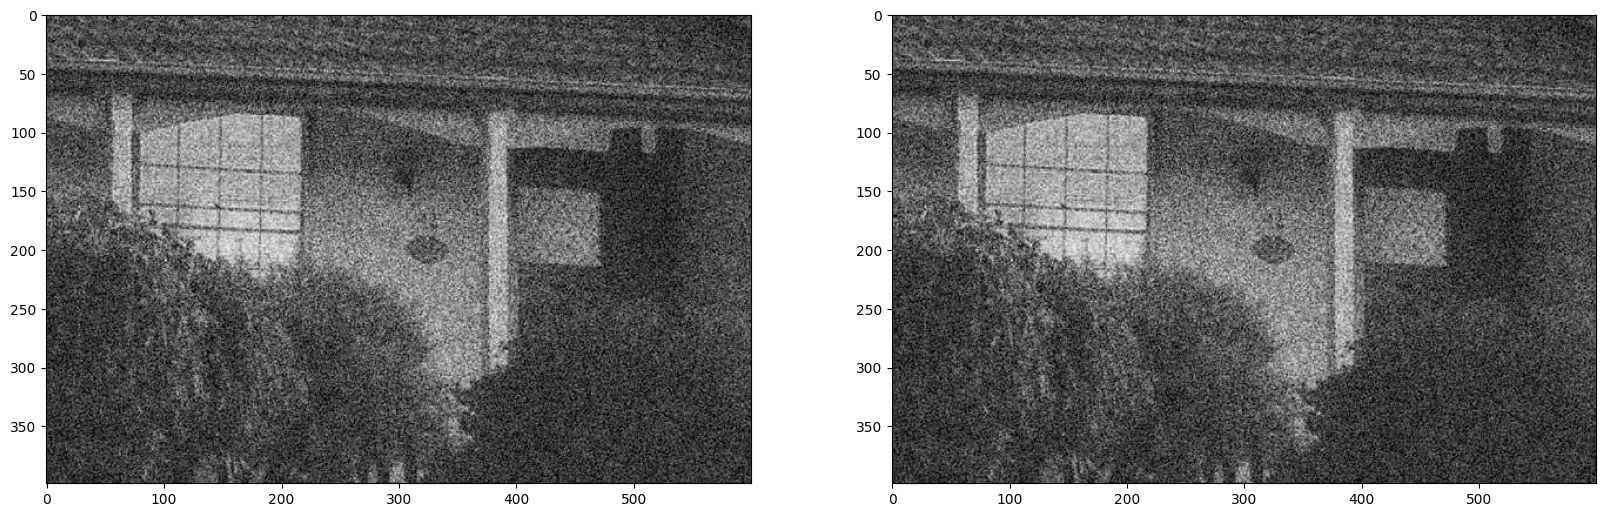

In [24]:
src = cv2.imread('images/noise.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.fastNlMeansDenoisingMulti([src, src, src, src, src], 2, 3)

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(src, cmap='gray')
plt.subplot(122), plt.imshow(dst, cmap='gray')

### **fastNlMeansDenoisingColoredMulti**

#### Cú pháp hàm
```python
dst = cv2.fastNlMeansDenoisingColoredMulti(srcImgs, imgToDenoiseIndex, temporalWindowSize[, dst[, h[, hColor[, templateWindowSize[, searchWindowSize]]]]])
```
Hàm có 3 đối số bắt buộc:  
1. `srcImgs`: Danh sách các ảnh đầu vào (list các ảnh màu, mảng numpy, kiểu `uint8`).
2. `imgToDenoiseIndex`: Chỉ số của ảnh cần khử nhiễu trong chuỗi ảnh (số nguyên).
3. `temporalWindowSize`: Số lượng ảnh liên tiếp sử dụng để khử nhiễu (số nguyên dương, thường là số lẻ).

Giải thích:  
- `dst`: Ảnh đầu ra sau khi khử nhiễu (tùy chọn).
- `h`: Tham số lọc cho thành phần độ sáng (mặc định 3-10).
- `hColor`: Tham số lọc cho thành phần màu (mặc định 3-10).
- `templateWindowSize`: Kích thước cửa sổ mẫu (số lẻ, mặc định là 7).
- `searchWindowSize`: Kích thước cửa sổ tìm kiếm (số lẻ, mặc định là 21).

Kết quả trả về:
- `dst`: Ảnh đã được khử nhiễu, cùng kích thước và kiểu với các ảnh đầu vào.